In [19]:
import pandas as pd
from sklearn.cluster import HDBSCAN
import matplotlib.pyplot as plt

In [20]:
url = "C:\\Users\\Abhi\\Desktop\\python_projects\\Accident Data Analysis-20240312T073202Z-001\\Accident Data Analysis\\Copy_of_AccidentReports.csv"
data = pd.read_csv(url)
print(data['DISTRICTNAME'].value_counts().to_json())

{"Bengaluru City":34526,"Tumakuru":16738,"Bengaluru Dist":15436,"Hassan":15365,"Mandya":15295,"Belagavi Dist":15058,"Chitradurga":11899,"Shivamogga":11583,"Mysuru Dist":10930,"Ramanagara":10711,"Udupi":9327,"Uttara Kannada":8607,"Bidar":8400,"Mangaluru City":7828,"Davanagere":7522,"Vijayapur":7327,"Chikkamagaluru":7011,"Dakshina Kannada":6782,"Bagalkot":6334,"Mysuru City":6162,"Haveri":5615,"Kalaburagi":5445,"Chickballapura":5059,"Raichur":4830,"Kolar":4803,"Belagavi City":4605,"Koppal":4476,"Chamarajanagar":4438,"Ballari":4250,"Vijayanagara":4240,"Kodagu":3781,"Dharwad":3531,"Kalaburagi City":3527,"Hubballi Dharwad City":3505,"Yadgir":2968,"Gadag":2673,"K.G.F":1135,"Karnataka Railways":39}


In [21]:
data = data[['Latitude', 'Longitude']]
#removing all 0.0 values
data = data[(data['Latitude']!=0.0) & (data['Latitude']!=0.0)]
data = data.to_numpy()
print(data)

[[16.063833  75.924106 ]
 [15.899076  75.932457 ]
 [16.09851   75.857045 ]
 ...
 [16.477004  77.108417 ]
 [16.752914  77.127311 ]
 [16.763682  77.1475789]]


In [15]:
temp = data['Latitude']
print(max(temp))

TypeError: 'method' object is not subscriptable

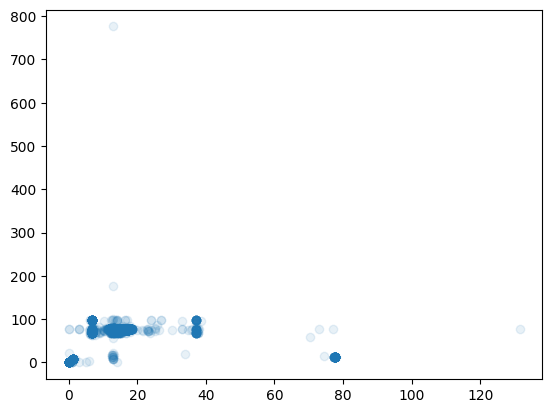

In [5]:
plt.scatter(data['Latitude'], data['Longitude'] ,alpha=0.1)

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters= i, init = 'k-means++',max_iter = 300, n_init = 10)
    kmean.fit(data)
    wcss.append(kmean.inertia_)

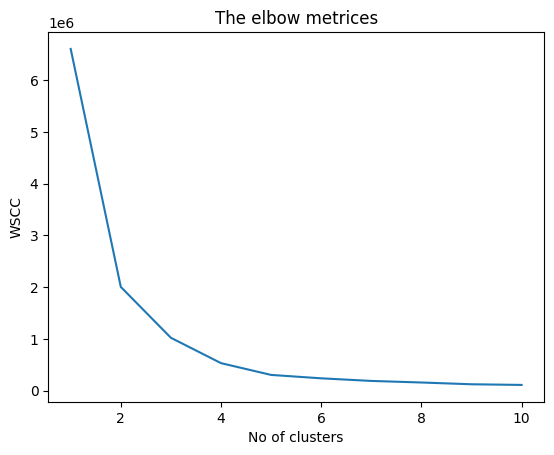

In [8]:
plt.plot(range(1,11), wcss)
plt.title("The elbow metrices")
plt.xlabel("No of clusters")
plt.ylabel("WSCC")
plt.show()

In [28]:
dbscan = HDBSCAN(min_cluster_size=10).fit(data)

In [29]:
labels = dbscan.labels_

In [30]:
print(len(labels))

97212
